In [1]:
import pandas as pd
dataset = pd.read_csv('Social_Network_Ads.csv')

In [2]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x = dataset.iloc[:, [1, 2, 3]]
y = dataset.iloc[:, -1]

In [4]:
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
X = x.values
Y = y.values

In [7]:
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [8]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [9]:
X.shape

(400, 3)

In [10]:
Y.shape

(400,)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [12]:
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [14]:
X

array([[1.        , 0.02380952, 0.02962963],
       [1.        , 0.4047619 , 0.03703704],
       [0.        , 0.19047619, 0.20740741],
       ...,
       [0.        , 0.76190476, 0.03703704],
       [1.        , 0.42857143, 0.13333333],
       [0.        , 0.73809524, 0.15555556]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [16]:
X_train.shape

(320, 3)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [18]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [19]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [21]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
10/10 [==============================] - 2s 4ms/step - loss: 0.6952 - accuracy: 0.4844
Epoch 2/100
10/10 [==============================] - 0s 998us/step - loss: 0.6885 - accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 0s 888us/step - loss: 0.6816 - accuracy: 0.7344
Epoch 4/100
10/10 [==============================] - 0s 887us/step - loss: 0.6763 - accuracy: 0.7281
Epoch 5/100
10/10 [==============================] - 0s 934us/step - loss: 0.6706 - accuracy: 0.6906
Epoch 6/100
10/10 [==============================] - 0s 890us/step - loss: 0.6656 - accuracy: 0.6844
Epoch 7/100
10/10 [==============================] - 0s 890us/step - loss: 0.6609 - accuracy: 0.6719
Epoch 8/100
10/10 [==============================] - 0s 932us/step - loss: 0.6564 - accuracy: 0.6687
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6687
Epoch 10/100
10/10 [==============================] - 0s 889us/step - loss: 0.6474 - accuracy: 

In [22]:
acc = hist.history['accuracy']
loss = hist.history['loss']

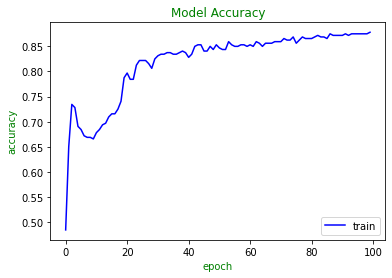

<Figure size 432x288 with 0 Axes>

In [23]:
from matplotlib import pyplot as plt
# plot training accuracy
plt.plot(acc, color='blue')
plt.title('Model Accuracy', color='green')
plt.ylabel('accuracy', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='lower right')
plt.show()
plt.savefig('accuracy_curve.png')

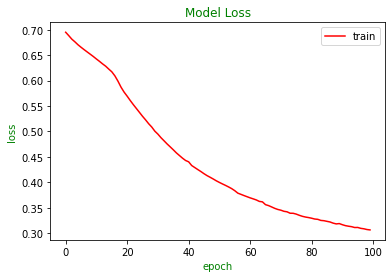

<Figure size 432x288 with 0 Axes>

In [24]:
# plot training loss
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

In [25]:
history_test = model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9000


In [26]:
history_test

[0.22359518706798553, 0.8999999761581421]